Face Detection using OpenCV. OpenCV pre-trained classifiers 1. Haar Classifier & 2. LBP (Local Binary Pattern) Classifier
OpenCV face detection classifier has its own pros and cons but the major differences are in accuracy and speed.

In [1]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import OpenCV Library
import cv2

import matplotlib.pyplot as plt
import time


Loading an image using OpenCV, it loads the image in BGR color space by default. To show the colored image using matplotlib we have to convert it to RGB space.

In [3]:
#To show the colored image using matplotlib we have to convert it to RGB space.

def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Haar Cascade Classifier

In [4]:
#Loading image
img1 = cv2.imread('data/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
if(img1 is not None):
    gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

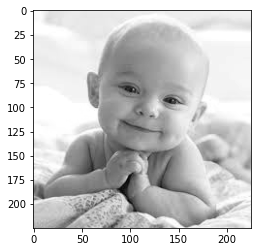

In [5]:
#matplotlib
plt.imshow(gray_img, cmap='gray')

In [6]:
#load cascade classifier training xml file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

In [7]:
#detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [8]:
#list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)

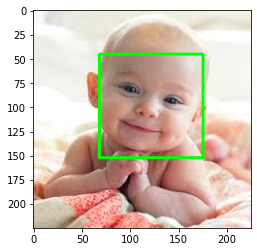

In [9]:
#conver image to RGB and show image
plt.imshow(convertToRGB(img1))

In [10]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

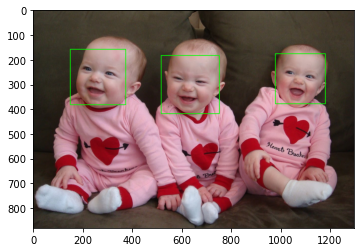

In [11]:
#load another image
img2 = cv2.imread('data/test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, img2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

False Positive

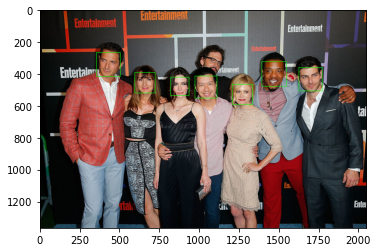

In [12]:
#load another image
img3 = cv2.imread('data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, img3)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

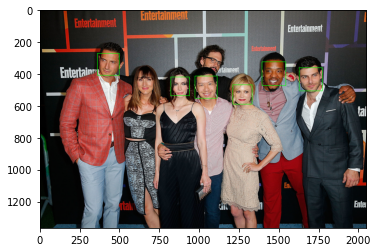

In [13]:
#load another image
img4 = cv2.imread('data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, img4, scaleFactor=1.2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

LBP Cascade Classifier

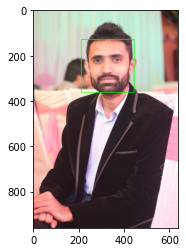

In [14]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load test image
img2 = cv2.imread('data/test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, img2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

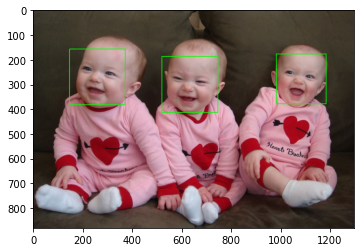

In [15]:
#load test image
img3 = cv2.imread('data/test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, img3)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

Haar and LBP Results Analysis

In [16]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('data/test5.jpg')
#load test image2
test2 = cv2.imread('data/test6.jpg')

Test1

In [17]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

In [18]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

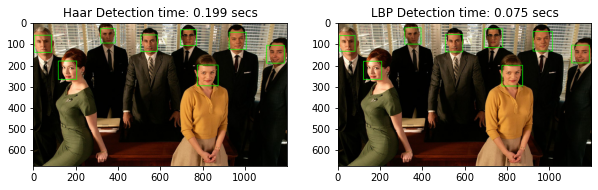

In [19]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

Accuracy: Both Haar and LBP detected faces successfully.
Speed: LBP was faster than Haar.

Test-2

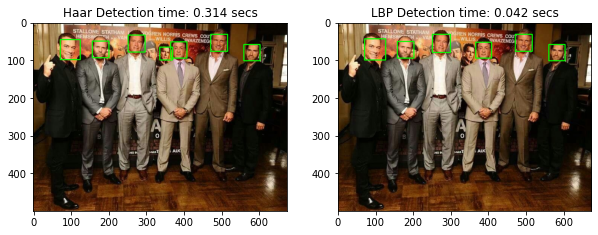

In [20]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

Accuracy: Haar detected more faces and than LBP.
Speed: LBP was significantly faster than Haar